In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# 解决中文乱码问题
import matplotlib
import matplotlib.font_manager as font_manager
# plt.rcParams['font.serif'] = ['Times New Roman']
# matplotlib.rcParams['font.sans-serif'] = ['FZSongYi-Z13S']
# matplotlib.rcParams['axes.unicode_minus'] = False

#显示全部特征
pd.set_option('display.max_columns', None)

d:\Anaconda3\envs\ML_py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Anaconda3\envs\ML_py38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\Anaconda3\envs\ML_py38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\Anaconda3\envs\ML_py38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
raw_train = pd.read_csv('yhxwfx_data/userlostprob_train.txt',sep='\t',parse_dates=['d','arrival'])
raw_test = pd.read_csv('yhxwfx_data/userlostprob_test.txt',sep='\t',parse_dates=['d','arrival'])

In [3]:
raw_train.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,NaN,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,NaN,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,NaN,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,NaN,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [4]:
na_rate = raw_train.isna().mean().sort_values(ascending=False)
na_rate[na_rate > 0.5].index

Index(['historyvisit_7ordernum', 'historyvisit_visit_detailpagenum'], dtype='object')

<Axes: >

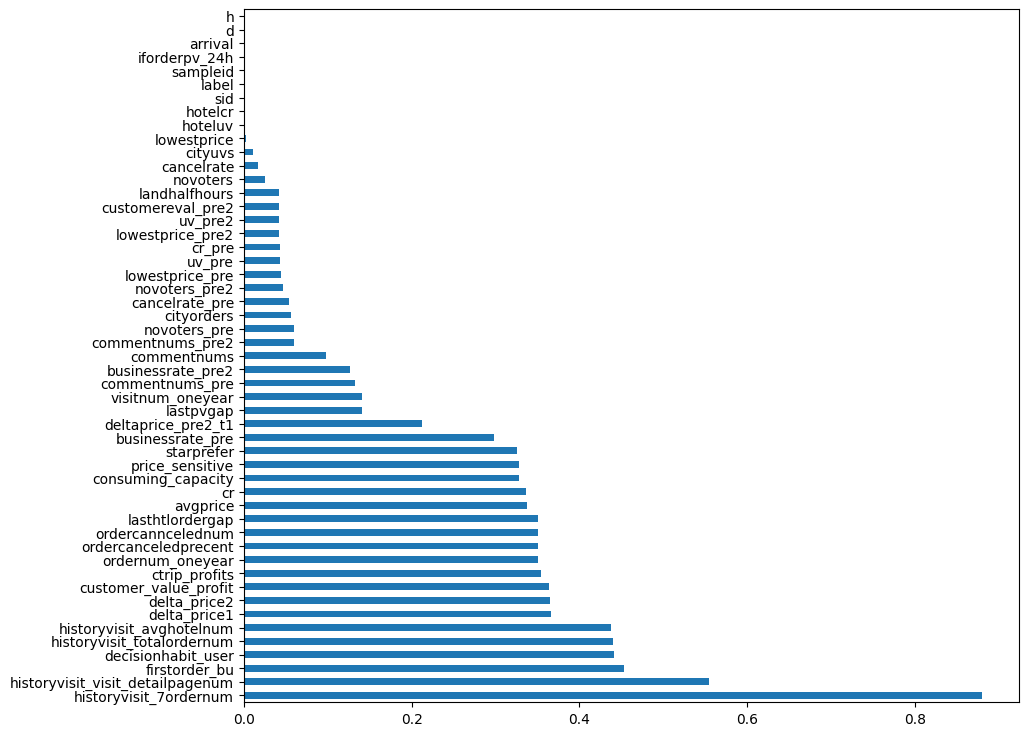

In [7]:
plt.figure(figsize=(10, 9))
na_rate.plot(kind='barh')

In [16]:
raw_train.groupby('label')['sampleid'].agg('count') / len(raw_train)

label
0    0.725548
1    0.274452
Name: sampleid, dtype: float64

In [ ]:
#清洗缺失值
na_threshold = 0.5
trian_copy = raw_train.copy(deep=True)
na_rate = raw_train.isna().mean()
trian_copy = raw_train.drop(columns=na_rate[na_rate > na_threshold].index)



In [4]:
import xgboost as xgb 

# training['label'] = 1-training.label
merges=[raw_train,raw_test]
merge_data = pd.concat(merges)

merge_data.drop('historyvisit_7ordernum',axis=1,inplace=True)
merge_data.drop('ordercanceledprecent',axis=1,inplace=True)
merge_data.drop('ordercanncelednum',axis=1,inplace=True)
merge_data.drop('historyvisit_visit_detailpagenum',axis=1,inplace=True)
merge_data.drop('delta_price1',axis=1,inplace=True)
merge_data.drop('ordernum_oneyear',axis=1,inplace=True)
merge_data.drop('avgprice',axis=1,inplace=True)
merge_data.drop('firstorder_bu',axis=1,inplace=True)
merge_data.drop('delta_price2',axis=1,inplace=True)
merge_data.drop('customer_value_profit',axis=1,inplace=True)
merge_data.drop('ctrip_profits',axis=1,inplace=True)
merge_data.drop('lasthtlordergap',axis=1,inplace=True)
merge_data=merge_data.fillna({'decisionhabit_user':-999,'historyvisit_totalordernum':-999,'starprefer':-999,'consuming_capacity':-999,'historyvisit_avghotelnum':-999,'price_sensitive':-999,'businessrate_pre':-999,'deltaprice_pre2_t1':-999,'lastpvgap':-999,'cr':-999,'visitnum_oneyear':-999})


merge_data['timediff'] = (merge_data['arrival']-merge_data['d']).dt.days
merge_data['dayofweek'] = merge_data['arrival'].dt.dayofweek

merge_data.loc[merge_data.dayofweek==0, 'isweekday'] = 0
merge_data.loc[merge_data.dayofweek==6, 'isweekday'] = 0
merge_data.loc[merge_data.dayofweek==1, 'isweekday'] = 1
merge_data.loc[merge_data.dayofweek==2, 'isweekday'] = 1
merge_data.loc[merge_data.dayofweek==3, 'isweekday'] = 1
merge_data.loc[merge_data.dayofweek==4, 'isweekday'] = 1
merge_data.loc[merge_data.dayofweek==5, 'isweekday'] = 1

dummies_df = pd.get_dummies(merge_data['dayofweek'])  
dummies_df = dummies_df.rename(columns=lambda x:'dayofweek'+str(x))
merge_data = pd.concat([merge_data,dummies_df],axis=1)

dummies_df = pd.get_dummies(merge_data['h'])  
dummies_df = dummies_df.rename(columns=lambda x:'h'+str(x))
merge_data = pd.concat([merge_data,dummies_df],axis=1)

def num_missing(x):    
    return sum(x.isnull())  

merge_data['num_missing'] = merge_data.apply(num_missing, axis=1) 
merge_data['cr_jet_num'] = merge_data['cr'].map(lambda x: 1 if x>1.39 else 0)
merge_data['businessrate_pre_jet_num'] = merge_data['businessrate_pre'].map(lambda x: 1 if x>0.5 else 0)
merge_data['businessrate_pre2_jet_num'] = merge_data['businessrate_pre2'].map(lambda x: 1 if x>0.5 else 0)


merge_data = merge_data.fillna(0)

data_train=merge_data.iloc[0:689945,]
data_test=merge_data.iloc[689945:,]

data_train.drop(['d'],axis=1,inplace=True)
data_train.drop(['arrival'],axis=1,inplace=True)
data_test.drop(['label'],axis=1,inplace=True)
data_test.drop(['d'],axis=1,inplace=True)
data_test.drop(['arrival'],axis=1,inplace=True)


In [5]:
from sklearn.model_selection import train_test_split

SEED = 2024
random_seed = SEED
#split train set,generate train,val,test set
train_xy = data_train.drop(['sampleid'],axis=1)
train,val = train_test_split(train_xy, test_size = 0.3, random_state=SEED)#random_state is of big influence for val-auc
#train1 = pd.merge(train_xy[train_xy.dayofweek0==1],train_xy[train_xy.dayofweek1==1],how='outer')
#train2 = pd.merge(train_xy[train_xy.dayofweek2==1],train_xy[train_xy.dayofweek3==1],how='outer')
#train3 = pd.merge(train2,train_xy[train_xy.dayofweek4==1],how='outer')
#train = pd.merge(train1,train3,how='outer')
#val = pd.merge(train_xy[train_xy.dayofweek5==1],train_xy[train_xy.dayofweek6==1],how='outer')
y = train.label
X = train.drop(['label'],axis=1)
val_y = val.label
val_X = val.drop(['label'],axis=1)
test_X = data_test.drop(['sampleid'],axis=1)
test_no = data_test.sampleid
#xgboost start here
dtest = xgb.DMatrix(test_X)
dval = xgb.DMatrix(val_X,label=val_y)
dtrain = xgb.DMatrix(X, label=y)
params={
	'booster':'gbtree',
	'objective': 'binary:logistic',
	'early_stopping_rounds':100,
    'eval_metric': 'auc',
	'gamma':0.1,
	'max_depth':8,
	'lambda':10,
    'subsample':0.75,
	'colsample_bytree':0.75,
	'min_child_weight':2, 
	'eta': 0.025,
	'seed':SEED,
    }

params['eval_metric'] = ['auc', 'error']

watchlist  = [(dtrain,'train'),(dval,'val')]#The early stopping is based on last set in the evallist
model = xgb.train(params,dtrain,num_boost_round=5000,evals=watchlist, verbose_eval=100)
#model.save_model('/Users/apple/Downloads/xgb8_23_3.model')
print("best best_ntree_limit",model.best_ntree_limit)   #did not save the best,why?

#predict test set (from the best iteration)
test_result = pd.DataFrame(columns=["sampleid","prob"])
test_result.sampleid = data_test.sampleid
test_result.prob = model.predict(dtest, ntree_limit=model.best_ntree_limit)

[16:02:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.

[0]	train-auc:0.69683	train-error:0.25695	val-auc:0.69246	val-error:0.25873
[100]	train-auc:0.77434	train-error:0.24084	val-auc:0.76499	val-error:0.24333
[200]	train-auc:0.79780	train-error:0.22975	val-auc:0.78348	val-error:0.23460
[300]	train-auc:0.81577	train-error:0.21940	val-auc:0.79716	val-error:0.22687
[400]	train-auc:0.82997	train-error:0.21136	val-auc:0.80791	val-error:0.22107
[500]	train-auc:0.84241	train-error:0.20390	val-auc:0.81717	val-error:0.21542
[600]	train-auc:0.85364	train-error:0.19687	val-auc:0.82555	val-error:0.21063
[700]	train-auc:0.86364	train-error:0.19024	val-auc:0.83306	val-error:0.20586
[800]	train-auc:0.87261	train-error:0.18424	val-auc:0.83998	val-error:0.20140
[900]	train-auc:0.88105	train-error:0.17824	val-auc:0.84647	val-error:0.19693
[1000]	trai

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(raw_test['label'], test_result)